# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up 


### Question(s) for Analysis
>1. Is a patient's age a factor in whether or not they will keep their appointments?
>2. Did patients with scholarship keep their appointments
>3. Influence of neighbourhood on attendance
>4. Did SMS notification help patients keep their appoiments 

In [2]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Load your data and print out few lines
df=pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Number of null values present in our data
df.isnull().any().sum()

0

In [7]:
# Number of unique values present in our data
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# Descriptive statistics of each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Identification of row with -1 value for age
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
# Number of duplicates of data
df.duplicated().sum()

0

In [11]:
# Number of duplicated patients id
df.PatientId.duplicated().sum()

48228


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# Some of the column field has spelling error like Hipertension, Handcap and N0-show
# Correcting typos in data field column
df.rename(columns={"Hipertension": "Hypertension", "Handcap":"Handicap", "No-show": "No_show"}, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# drop row with age as -1 value
df.drop(index=99832, axis=1, inplace=True)

In [14]:
# check if -1 age value is present
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis
# Distribution of various columns




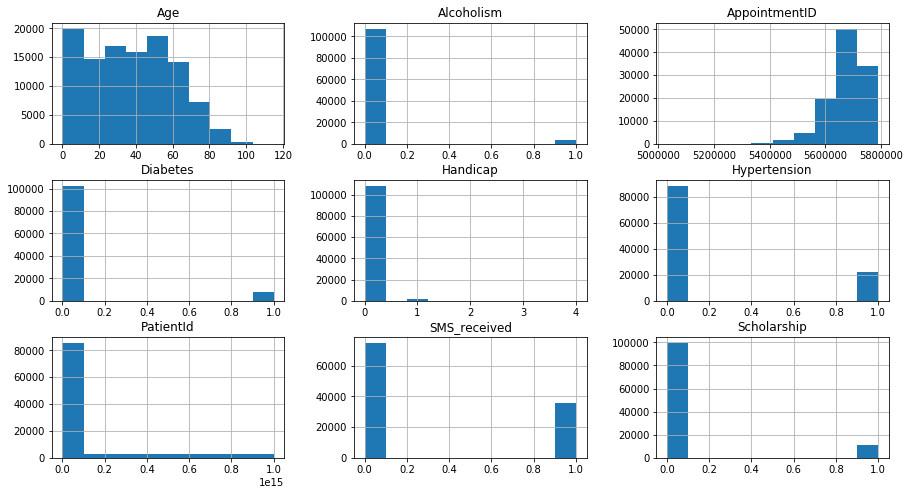

In [15]:
# Distribution of various columns
df.hist(figsize = (15, 8));

### Research Question 1 (Is a patient's age a factor in whether or not they will keep their appointments?)

In [16]:
# No_show and show categorisation
no_show = df.No_show=="Yes"
show = df.No_show=="No"

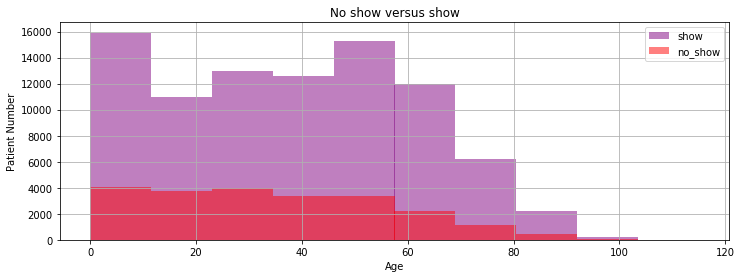

In [17]:
# Influence of age on attendance rate
def rate_att_age(df, column, show, no_show):
   plt.figure(figsize=[12, 4])
   df[column][show].hist(alpha=.5, bins=10, color="purple", label="show")
   df[column][no_show].hist(alpha=.5, bins=10, color="red", label="no_show")
   plt.legend();
   plt.title("No show versus show")
   plt.xlabel("Age")
   plt.ylabel("Patient Number")
rate_att_age(df, "Age", show, no_show)

### Research Question 2  (What is the influence of gender on the the rate of attendance)

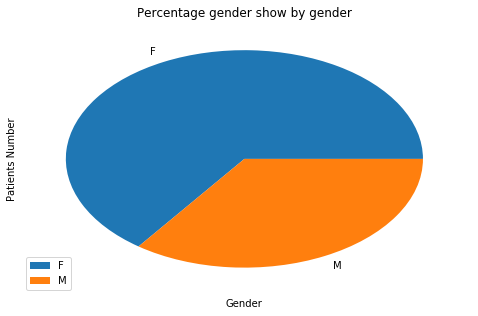

In [18]:
# percentage of attendance by sexes
def rate_att(df, column, show, no_show):
    plt.figure(figsize=[8,5])
    df[column][show].value_counts(normalize=True).plot(kind="pie", label="show")
    plt.legend();
    plt.title("Percentage gender show by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients Number");
rate_att(df, "Gender", show, no_show)

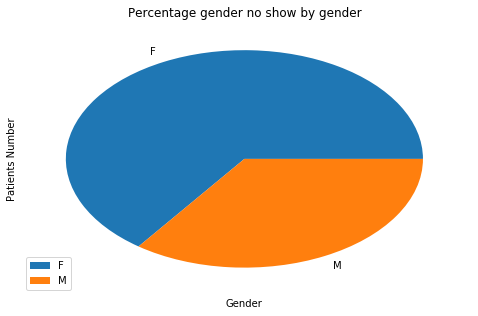

In [19]:
# percentage of non attendance by sexes
def rate_nonatt(df, column, show, noshow):
    plt.figure(figsize=[8,5])
    df[column][show].value_counts(normalize=True).plot(kind="pie", label="show")
    plt.legend();
    plt.title("Percentage gender no show by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients Number");
rate_nonatt(df, "Gender", show, no_show)

In [20]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Research Question 3 (Influence of neighbourhood on attendance)

Text(0,0.5,'Patients Number')

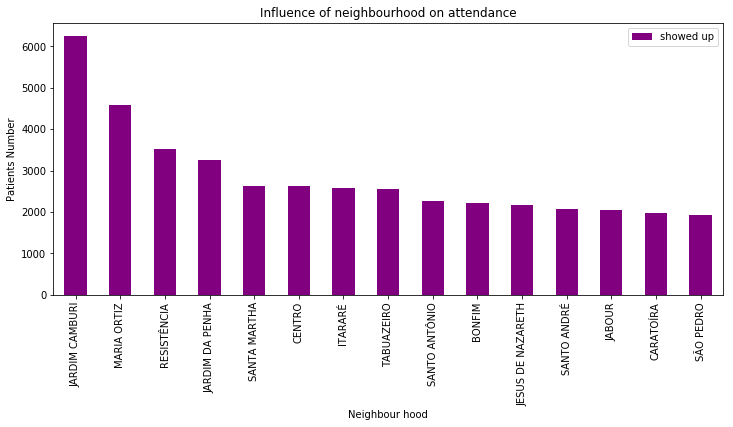

In [31]:
#Top 15 neihbourhood that showed up for their appoitment
plt.figure(figsize=[12, 5])
df.Neighbourhood[show].value_counts()[:15].plot(kind="bar", color="purple", label="showed up")
plt.legend()
plt.title("Influence of neighbourhood on attendance")
plt.xlabel("Neighbour hood")
plt.ylabel("Patients Number")

These are the top 15 neighbourood that kept to their appoitment

### Research Question 4 (Influence of SMS notification on attendance)

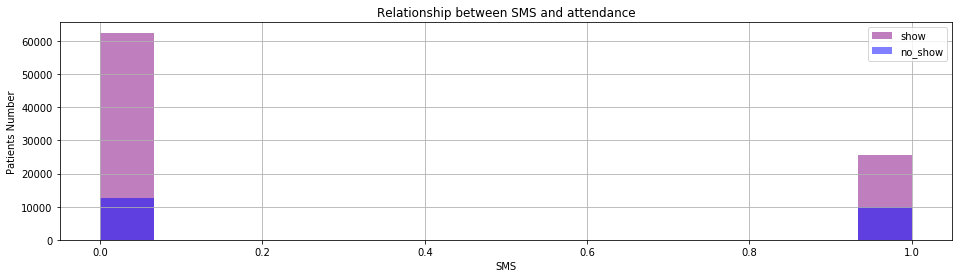

In [24]:
#Effect of SMS on attendance
def att_sms(df, column, show, noshow):
    plt.figure(figsize=[16,4])
    df[column][show].hist(alpha=0.5, bins=15, color="purple", label="show")
    df[column][no_show].hist(alpha=0.5, bins=15, color="blue", label="no_show")
    plt.legend();
    plt.title("Relationship between SMS and attendance")
    plt.xlabel("SMS")
    plt.ylabel("Patients Number");
att_sms(df,"SMS_received", show, no_show)

<a id='conclusions'></a>
### Conclusions

> Several factors affect the attendance of patients. Some of the factors analysed are age, scholarship, neighbourhood and SMS notification. 
> People within the age brackets of 0 to 4 showed up more for their appoitments compared to other age brackets.
> In terms of gender, the females took their health more serious compared with the males.
> Neighbourhood also has influence on patients keeping their appoitments. Jardin Carburi neighbourhood had the highest show rate. 
> SMS notification did not show any effect in patients keeping their appoitments. 

### Limitations

> Although jardin carburi turned out for must appoitment, there was no clear information how far it is from the appointment center compared with other neighbourhood. The could help to clearly know if distance of neighbourhood was clearly a factor.
> The gender sample had more females samples than males. 
> Surprisingly, people who received SMS notification had the lowest turnout. this shouldn't be so and further investigation can be done to know why. 

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0